<a href="https://colab.research.google.com/github/shamrithy2020/GreenFuture_IMS_Data/blob/main/GreenFuture_IMS_Analysis_Shamrithy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"I created a public GitHub repository named GreenFuture_IMS_Data and uploaded the dataset file greenfuture_ideas_dataset.csv.
I obtained the raw link by clicking on the file and selecting 'Raw'.
The raw link to the dataset is: https://raw.githubusercontent.com/shamrithy2020/GreenFuture_IMS_Data/main/greenfuture_ideas_dataset.csv

# **Section 1**

# **1. Import Dataset and Libraries**

In [ ]:
# Install and load necessary libraries
install.packages("sqldf")
library(sqldf)
library(readr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load CSV from GitHub
data <- read_csv("https://raw.githubusercontent.com/shamrithy2020/GreenFuture_IMS_Data/main/greenfuture_ideas_dataset.csv")

# View the data
head(data)

Rows: 3000 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): Employee ID, Office Location, Department, Idea Submission Date, Id...
dbl  (1): Number of Votes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Employee ID,Office Location,Department,Idea Submission Date,Idea Title,Idea Category,Number of Votes,Collaboration Status,Approval Status,Implementation Status,Security Concern Flag
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
587b45d8,Germany,Renewable Energy,16/04/2024,Idea 1,Sustainable Transport,231,Single Contributor,Pending,Not Started,No
0d3e8b8e,Canada,Renewable Energy,14/01/2024,Idea 2,Water Management,477,Cross-Regional Team,Approved,In Progress,No
fa012fe7,France,Environmental Policy,10/01/2025,Idea 3,Renewable Energy,48,Cross-Regional Team,Approved,Not Started,Yes
cb8ed680,Japan,Technology,24/12/2023,Idea 4,Circular Economy,330,Cross-Regional Team,Approved,Completed,No
333fff26,Australia,Technology,13/02/2025,Idea 5,Circular Economy,428,Single Contributor,Approved,Not Started,No
a34ebb0f,India,Technology,08/09/2024,Idea 6,Circular Economy,431,Single Contributor,Rejected,Not Started,No


# **2. Basic Queries**

In [ ]:
# 1. Select all from the dataset
sqldf("SELECT * FROM data LIMIT 5")

Employee ID,Office Location,Department,Idea Submission Date,Idea Title,Idea Category,Number of Votes,Collaboration Status,Approval Status,Implementation Status,Security Concern Flag
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
587b45d8,Germany,Renewable Energy,16/04/2024,Idea 1,Sustainable Transport,231,Single Contributor,Pending,Not Started,No
0d3e8b8e,Canada,Renewable Energy,14/01/2024,Idea 2,Water Management,477,Cross-Regional Team,Approved,In Progress,No
fa012fe7,France,Environmental Policy,10/01/2025,Idea 3,Renewable Energy,48,Cross-Regional Team,Approved,Not Started,Yes
cb8ed680,Japan,Technology,24/12/2023,Idea 4,Circular Economy,330,Cross-Regional Team,Approved,Completed,No
333fff26,Australia,Technology,13/02/2025,Idea 5,Circular Economy,428,Single Contributor,Approved,Not Started,No


In [ ]:
# 2. Count ideas submitted by each department
sqldf("SELECT Department, COUNT(*) as Idea_Count FROM data GROUP BY Department")

Department,Idea_Count
<chr>,<int>
Environmental Policy,499
Infrastructure,547
Renewable Energy,513
Research,498
Technology,457
Urban Development,486


In [ ]:
# 3. Average votes by office location
sqldf("SELECT [Office Location], AVG([Number of Votes]) as Avg_Votes FROM data GROUP BY [Office Location]")


Office Location,Avg_Votes
<chr>,<dbl>
Australia,254.5205
Brazil,254.9207
Canada,247.0119
China,248.9714
France,228.8759
Germany,246.4246
India,246.5991
Japan,263.2432
Mexico,264.7542


In [ ]:
# 4. Total approved ideas by region
sqldf("SELECT [Office Location], COUNT(*) as Approved_Ideas FROM data WHERE [Approval Status] = 'Approved' GROUP BY [Office Location]")

Office Location,Approved_Ideas
<chr>,<int>
Australia,79
Brazil,86
Canada,87
China,95
France,78
Germany,91
India,69
Japan,84
Mexico,81


# **3. Demonstrate Insert, Update, Delete, Select in SQL**

In [ ]:
#creating a sample dataframe
library(sqldf)
library(sqldf)

# Sample 'ideas' data frame
ideas <- data.frame(
  EmployeeID = c(101, 102, 103),
  OfficeLocation = c("Colombo", "Kandy", "Galle"),
  Department = c("HR", "Marketing", "Legal"),
  IdeaSubmissionDate = c("2024-01-01", "2024-02-15", "2024-03-10"),
  IdeaTitle = c("Training Program", "Product Launch", "Legal Compliance"),
  IdeaCategory = c("HR Tech", "Marketing", "Legal Tech"),
  NumberOfVotes = c(12, 19, 7),
  CollaborationStatus = c("Active", "Completed", "Active"),
  ApprovalStatus = c("Approved", "Pending", "Pending"),
  ImplementationStatus = c("In Progress", "Completed", "Not Started"),
  SecurityConcernFlag = c(0, 1, 0)
)

cat("Initial Data:\n")
print(ideas)


Initial Data:
  EmployeeID OfficeLocation Department IdeaSubmissionDate        IdeaTitle
1        101        Colombo         HR         2024-01-01 Training Program
2        102          Kandy  Marketing         2024-02-15   Product Launch
3        103          Galle      Legal         2024-03-10 Legal Compliance
  IdeaCategory NumberOfVotes CollaborationStatus ApprovalStatus
1      HR Tech            12              Active       Approved
2    Marketing            19           Completed        Pending
3   Legal Tech             7              Active        Pending
  ImplementationStatus SecurityConcernFlag
1          In Progress                   0
2            Completed                   1
3          Not Started                   0


In [ ]:
# SELECT - Select ideas with 'Pending' approval status
selected_ideas <- sqldf("SELECT * FROM ideas WHERE ApprovalStatus = 'Pending'")
cat("\nSelected Ideas with 'Pending' Approval Status:\n")
print(selected_ideas)


Selected Ideas with 'Pending' Approval Status:
  EmployeeID OfficeLocation Department IdeaSubmissionDate        IdeaTitle
1        102          Kandy  Marketing         2024-02-15   Product Launch
2        103          Galle      Legal         2024-03-10 Legal Compliance
  IdeaCategory NumberOfVotes CollaborationStatus ApprovalStatus
1    Marketing            19           Completed        Pending
2   Legal Tech             7              Active        Pending
  ImplementationStatus SecurityConcernFlag
1            Completed                   1
2          Not Started                   0


In [ ]:
# INSERT - New row to be added
new_row <- data.frame(
  EmployeeID = 104,
  OfficeLocation = "Jaffna",
  Department = "Legal",
  IdeaSubmissionDate = "2024-04-01",
  IdeaTitle = "Document Tracker",
  IdeaCategory = "Legal Tech",
  NumberOfVotes = 22,
  CollaborationStatus = "Active",
  ApprovalStatus = "Pending",
  ImplementationStatus = "Not Started",
  SecurityConcernFlag = 0
)


ideas <- sqldf("SELECT * FROM ideas UNION ALL SELECT * FROM new_row")

cat("\nAfter INSERT:\n")
print(ideas)


After INSERT:
  EmployeeID OfficeLocation Department IdeaSubmissionDate        IdeaTitle
1        101        Colombo         HR         2024-01-01 Training Program
2        102          Kandy  Marketing         2024-02-15   Product Launch
3        103          Galle      Legal         2024-03-10 Legal Compliance
4        104         Jaffna      Legal         2024-04-01 Document Tracker
  IdeaCategory NumberOfVotes CollaborationStatus ApprovalStatus
1      HR Tech            12              Active       Approved
2    Marketing            19           Completed        Pending
3   Legal Tech             7              Active        Pending
4   Legal Tech            22              Active        Pending
  ImplementationStatus SecurityConcernFlag
1          In Progress                   0
2            Completed                   1
3          Not Started                   0
4          Not Started                   0


In [ ]:
# UPDATE - Update 'ApprovalStatus' for a specific 'IdeaTitle'
update_approval_status <- function(idea_title, new_status) {
  ideas <- sqldf(paste("SELECT * FROM ideas WHERE IdeaTitle != '", idea_title, "'", sep = ""))
  new_row <- data.frame(
    EmployeeID = 104,
    OfficeLocation = "Jaffna",
    Department = "Legal",
    IdeaSubmissionDate = "2024-04-01",
    IdeaTitle = idea_title,
    IdeaCategory = "Legal Tech",
    NumberOfVotes = 22,
    CollaborationStatus = "Active",
    ApprovalStatus = new_status,
    ImplementationStatus = "Not Started",
    SecurityConcernFlag = 0
  )


  ideas <- rbind(ideas, new_row)

  cat("\nAfter UPDATE (ApprovalStatus for '", idea_title, "' set to '", new_status, "'):\n", sep = "")
  print(ideas)
}


update_approval_status("Document Tracker", "Approved")






After UPDATE (ApprovalStatus for 'Document Tracker' set to 'Approved'):
  EmployeeID OfficeLocation Department IdeaSubmissionDate        IdeaTitle
1        101        Colombo         HR         2024-01-01 Training Program
2        102          Kandy  Marketing         2024-02-15   Product Launch
3        103          Galle      Legal         2024-03-10 Legal Compliance
4        104         Jaffna      Legal         2024-04-01 Document Tracker
  IdeaCategory NumberOfVotes CollaborationStatus ApprovalStatus
1      HR Tech            12              Active       Approved
2    Marketing            19           Completed        Pending
3   Legal Tech             7              Active        Pending
4   Legal Tech            22              Active       Approved
  ImplementationStatus SecurityConcernFlag
1          In Progress                   0
2            Completed                   1
3          Not Started                   0
4          Not Started                   0


In [ ]:
# DELETE - Remove row based on a condition (IdeaTitle)
delete_idea <- function(idea_title) {
  ideas <- sqldf(paste("SELECT * FROM ideas WHERE IdeaTitle != '", idea_title, "'", sep = ""))

  cat("\nAfter DELETE (Idea with title '", idea_title, "' removed):\n", sep = "")
  print(ideas)
}


delete_idea("Document Tracker")




After DELETE (Idea with title 'Document Tracker' removed):
  EmployeeID OfficeLocation Department IdeaSubmissionDate        IdeaTitle
1        101        Colombo         HR         2024-01-01 Training Program
2        102          Kandy  Marketing         2024-02-15   Product Launch
3        103          Galle      Legal         2024-03-10 Legal Compliance
  IdeaCategory NumberOfVotes CollaborationStatus ApprovalStatus
1      HR Tech            12              Active       Approved
2    Marketing            19           Completed        Pending
3   Legal Tech             7              Active        Pending
  ImplementationStatus SecurityConcernFlag
1          In Progress                   0
2            Completed                   1
3          Not Started                   0


# **4. Aggregate / Arithmetic example**

In [ ]:
# Load dataset
library(readr)
library(dplyr)
library(sqldf)

ideas <- read_csv("https://raw.githubusercontent.com/shamrithy2020/GreenFuture_IMS_Data/main/greenfuture_ideas_dataset.csv")

# Clean column names
colnames(ideas) <- make.names(colnames(ideas))



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Rows: 3000 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): Employee ID, Office Location, Department, Idea Submission Date, Id...
dbl  (1): Number of Votes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
#Average Votes per Department
result1 <- sqldf("SELECT Department, AVG(Number Of Votes) AS AvgVotes FROM ideas GROUP BY Department")
print(result1)


ERROR: Error: near "Of": syntax error


In [ ]:
#Total Votes per Office Location
result2 <- sqldf("SELECT OfficeLocation, SUM(NumberOfVotes) AS TotalVotes FROM ideas GROUP BY OfficeLocation")
print(result2)


  OfficeLocation TotalVotes
1        Colombo         12
2          Galle          7
3         Jaffna         22
4          Kandy         19


In [ ]:
#Maximum and Minimum Votes
result3 <- sqldf("SELECT MAX(NumberOfVotes) AS MaxVotes, MIN(NumberOfVotes) AS MinVotes FROM ideas")
print(result3)


  MaxVotes MinVotes
1       22        7


In [ ]:
#Count of Ideas per Category
result4 <- sqldf("SELECT IdeaCategory, COUNT(*) AS IdeaCount FROM ideas GROUP BY IdeaCategory")
print(result4)


  IdeaCategory IdeaCount
1      HR Tech         1
2   Legal Tech         2
3    Marketing         1


In [ ]:
#Add Bonus Votes (+10)
result5 <- sqldf("SELECT IdeaTitle, NumberOfVotes, NumberOfVotes + 10 AS BonusVotes FROM ideas")
print(result5)


         IdeaTitle NumberOfVotes BonusVotes
1 Training Program            12         22
2   Product Launch            19         29
3 Legal Compliance             7         17
4 Document Tracker            22         32


In [ ]:
#Percentage of Votes (out of 100)
result6 <- sqldf("SELECT IdeaTitle, NumberOfVotes, ROUND((NumberOfVotes / 100.0) * 100, 2) AS VotePercentage FROM ideas")
print(result6)


         IdeaTitle NumberOfVotes VotePercentage
1 Training Program            12             12
2   Product Launch            19             19
3 Legal Compliance             7              7
4 Document Tracker            22             22


In [ ]:
#Security Concern Count
result7 <- sqldf("SELECT SecurityConcernFlag, COUNT(*) AS Count FROM ideas GROUP BY SecurityConcernFlag")
print(result7)


  SecurityConcernFlag Count
1                   0     3
2                   1     1


# **5. SQL Queries for Analysis**

In [ ]:
library(DBI)
library(RSQLite)
library(readr)


In [ ]:
library(readr)
data <- read_csv("https://raw.githubusercontent.com/shamrithy2020/GreenFuture_IMS_Data/main/greenfuture_ideas_dataset.csv")



Rows: 3000 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): Employee ID, Office Location, Department, Idea Submission Date, Id...
dbl  (1): Number of Votes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
colnames(data)


[1] "Employee ID"           "Office Location"       "Department"           
 [4] "Idea Submission Date"  "Idea Title"            "Idea Category"        
 [7] "Number of Votes"       "Collaboration Status"  "Approval Status"      
[10] "Implementation Status" "Security Concern Flag"

In [ ]:
library(DBI)
library(RSQLite)

# Connect to SQLite in memory
conn <- dbConnect(SQLite(), ":memory:")

# Write table
dbWriteTable(conn, "ideas", data)

In [ ]:
#Average Votes per Department
avg_votes_query <- '
SELECT "Department", AVG("Number of Votes") AS AvgVotes
FROM ideas
GROUP BY "Department"
'
avg_votes <- dbGetQuery(conn, avg_votes_query)
print(avg_votes)



            Department AvgVotes
1 Environmental Policy 252.9259
2       Infrastructure 243.6892
3     Renewable Energy 246.6316
4             Research 248.5803
5           Technology 248.0460
6    Urban Development 250.7551


In [ ]:
#Idea Count per Office Location
office_count_query <- '
SELECT "Office Location", COUNT(*) AS TotalIdeas
FROM ideas
GROUP BY "Office Location"
'
office_count <- dbGetQuery(conn, office_count_query)
print(office_count)


   Office Location TotalIdeas
1        Australia        244
2           Brazil        227
3           Canada        252
4            China        280
5           France        266
6          Germany        252
7            India        222
8            Japan        259
9           Mexico        240
10    South Africa        260
11              UK        257
12             USA        241


In [ ]:
#Approved Ideas by Department
approved_query <- '
SELECT "Department", COUNT(*) AS ApprovedIdeas
FROM ideas
WHERE "Approval Status" = "Approved"
GROUP BY "Department"
'
approved_ideas <- dbGetQuery(conn, approved_query)
print(approved_ideas)


            Department ApprovedIdeas
1 Environmental Policy           169
2       Infrastructure           183
3     Renewable Energy           182
4             Research           169
5           Technology           172
6    Urban Development           162


In [ ]:
#Collaboration Trends
collab_query <- '
SELECT "Collaboration Status", COUNT(*) AS Total
FROM ideas
GROUP BY "Collaboration Status"
'
collab_status <- dbGetQuery(conn, collab_query)
print(collab_status)


  Collaboration Status Total
1  Cross-Regional Team  1455
2   Single Contributor  1545


In [ ]:
#Security Concerns by Office Location
security_query <- '
SELECT "Office Location", SUM("Security Concern Flag") AS SecurityConcerns
FROM ideas
GROUP BY "Office Location"
'
security_flags <- dbGetQuery(conn, security_query)
print(security_flags)


   Office Location SecurityConcerns
1        Australia                0
2           Brazil                0
3           Canada                0
4            China                0
5           France                0
6          Germany                0
7            India                0
8            Japan                0
9           Mexico                0
10    South Africa                0
11              UK                0
12             USA                0


# **Data Manipulation and Transformation in R**

In [ ]:
# Load Required Libraries and Sample Data
library(dplyr)
library(readr)

# Load dataset
ideas <- read_csv("https://raw.githubusercontent.com/shamrithy2020/GreenFuture_IMS_Data/main/greenfuture_ideas_dataset.csv")



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Rows: 3000 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): Employee ID, Office Location, Department, Idea Submission Date, Id...
dbl  (1): Number of Votes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
#Select Specific Columns
selected_data <- ideas %>%
  select(`Employee ID`, `Department`, `Idea Category`, `Number of Votes`)
head(selected_data)


Employee ID,Department,Idea Category,Number of Votes
<chr>,<chr>,<chr>,<dbl>
587b45d8,Renewable Energy,Sustainable Transport,231
0d3e8b8e,Renewable Energy,Water Management,477
fa012fe7,Environmental Policy,Renewable Energy,48
cb8ed680,Technology,Circular Economy,330
333fff26,Technology,Circular Economy,428
a34ebb0f,Technology,Circular Economy,431


In [ ]:
#Filter Rows Based on Conditions
filtered_data <- ideas %>%
  filter(`Department` == "Technology" & `Number of Votes` > 50)
head(filtered_data)


Employee ID,Office Location,Department,Idea Submission Date,Idea Title,Idea Category,Number of Votes,Collaboration Status,Approval Status,Implementation Status,Security Concern Flag
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
cb8ed680,Japan,Technology,24/12/2023,Idea 4,Circular Economy,330,Cross-Regional Team,Approved,Completed,No
333fff26,Australia,Technology,13/02/2025,Idea 5,Circular Economy,428,Single Contributor,Approved,Not Started,No
a34ebb0f,India,Technology,08/09/2024,Idea 6,Circular Economy,431,Single Contributor,Rejected,Not Started,No
27febb2d,Brazil,Technology,17/05/2024,Idea 15,Sustainable Transport,425,Single Contributor,Approved,In Progress,No
dcbf1bd1,China,Technology,16/11/2024,Idea 16,Smart Cities,216,Cross-Regional Team,Rejected,Not Started,No
25120b55,UK,Technology,08/04/2024,Idea 33,Sustainable Transport,353,Cross-Regional Team,Approved,Completed,No


In [ ]:
#Create New Columns / Mutate
transformed_data <- ideas %>%
  mutate(VoteCategory = ifelse(`Number of Votes` > 50, "High", "Low"))
head(transformed_data)


Employee ID,Office Location,Department,Idea Submission Date,Idea Title,Idea Category,Number of Votes,Collaboration Status,Approval Status,Implementation Status,Security Concern Flag,VoteCategory
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
587b45d8,Germany,Renewable Energy,16/04/2024,Idea 1,Sustainable Transport,231,Single Contributor,Pending,Not Started,No,High
0d3e8b8e,Canada,Renewable Energy,14/01/2024,Idea 2,Water Management,477,Cross-Regional Team,Approved,In Progress,No,High
fa012fe7,France,Environmental Policy,10/01/2025,Idea 3,Renewable Energy,48,Cross-Regional Team,Approved,Not Started,Yes,Low
cb8ed680,Japan,Technology,24/12/2023,Idea 4,Circular Economy,330,Cross-Regional Team,Approved,Completed,No,High
333fff26,Australia,Technology,13/02/2025,Idea 5,Circular Economy,428,Single Contributor,Approved,Not Started,No,High
a34ebb0f,India,Technology,08/09/2024,Idea 6,Circular Economy,431,Single Contributor,Rejected,Not Started,No,High


In [ ]:
#Group By and Summarize
summary_votes <- ideas %>%
  group_by(`Department`) %>%
  summarise(AverageVotes = mean(`Number of Votes`), TotalIdeas = n())
print(summary_votes)


# A tibble: 6 × 3
  Department           AverageVotes TotalIdeas
  <chr>                       <dbl>      <int>
1 Environmental Policy         253.        499
2 Infrastructure               244.        547
3 Renewable Energy             247.        513
4 Research                     249.        498
5 Technology                   248.        457
6 Urban Development            251.        486


In [ ]:
#Arrange / Sort Data
sorted_ideas <- ideas %>%
  arrange(desc(`Number of Votes`))
head(sorted_ideas)


Employee ID,Office Location,Department,Idea Submission Date,Idea Title,Idea Category,Number of Votes,Collaboration Status,Approval Status,Implementation Status,Security Concern Flag
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
f2105213,USA,Infrastructure,20/12/2024,Idea 422,Water Management,500,Single Contributor,Rejected,Not Started,No
18b9a7b4,China,Infrastructure,17/06/2023,Idea 915,Sustainable Transport,500,Cross-Regional Team,Rejected,Not Started,No
7d239d23,USA,Urban Development,18/10/2024,Idea 1020,Circular Economy,500,Cross-Regional Team,Approved,In Progress,Yes
c9a9b03d,Brazil,Research,09/08/2024,Idea 1146,Renewable Energy,500,Single Contributor,Rejected,Not Started,No
7fde2f60,France,Infrastructure,06/01/2024,Idea 1323,Circular Economy,500,Single Contributor,Rejected,Not Started,No
be71d545,Brazil,Technology,20/01/2025,Idea 2573,Renewable Energy,500,Single Contributor,Rejected,Not Started,No


# **Data Visualisation in R**

In [ ]:
library(ggplot2)
library(readr)

# Load dataset
ideas <- read_csv("https://raw.githubusercontent.com/shamrithy2020/GreenFuture_IMS_Data/main/greenfuture_ideas_dataset.csv")


Rows: 3000 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): Employee ID, Office Location, Department, Idea Submission Date, Id...
dbl  (1): Number of Votes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


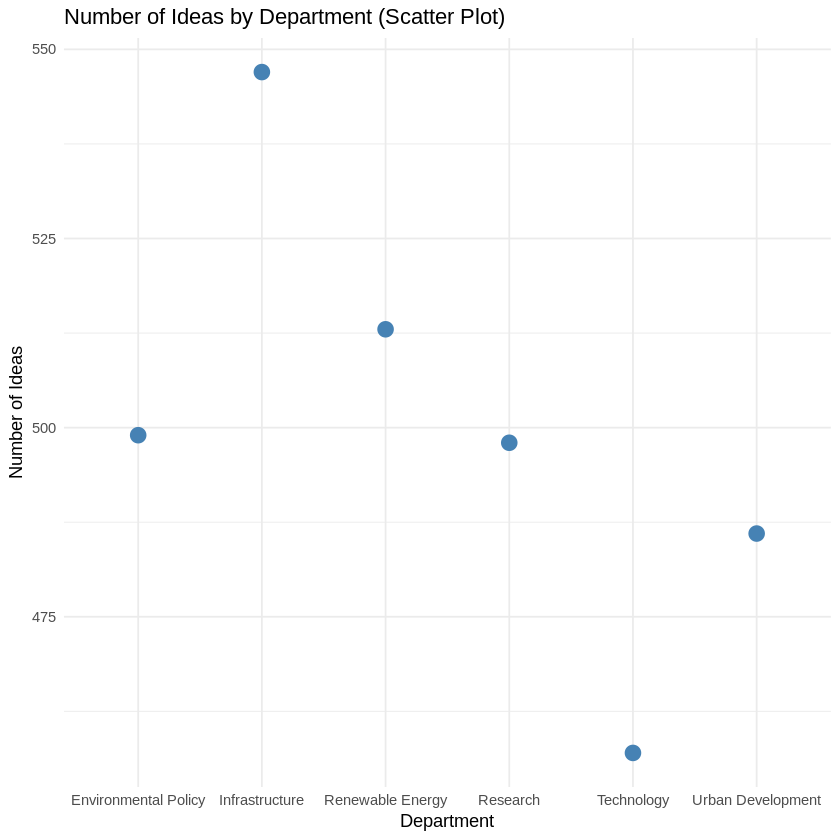

In [ ]:
library(ggplot2)
library(dplyr)

# Summarize the data
ideas_summary <- ideas %>%
  group_by(Department) %>%
  summarise(NumberOfIdeas = n())

#Example 1 - Scatter plot: Department vs Number of Ideas
ggplot(ideas_summary, aes(x = Department, y = NumberOfIdeas)) +
  geom_point(size = 4, color = "steelblue") +
  labs(title = "Number of Ideas by Department (Scatter Plot)",
       x = "Department",
       y = "Number of Ideas") +
  theme_minimal()


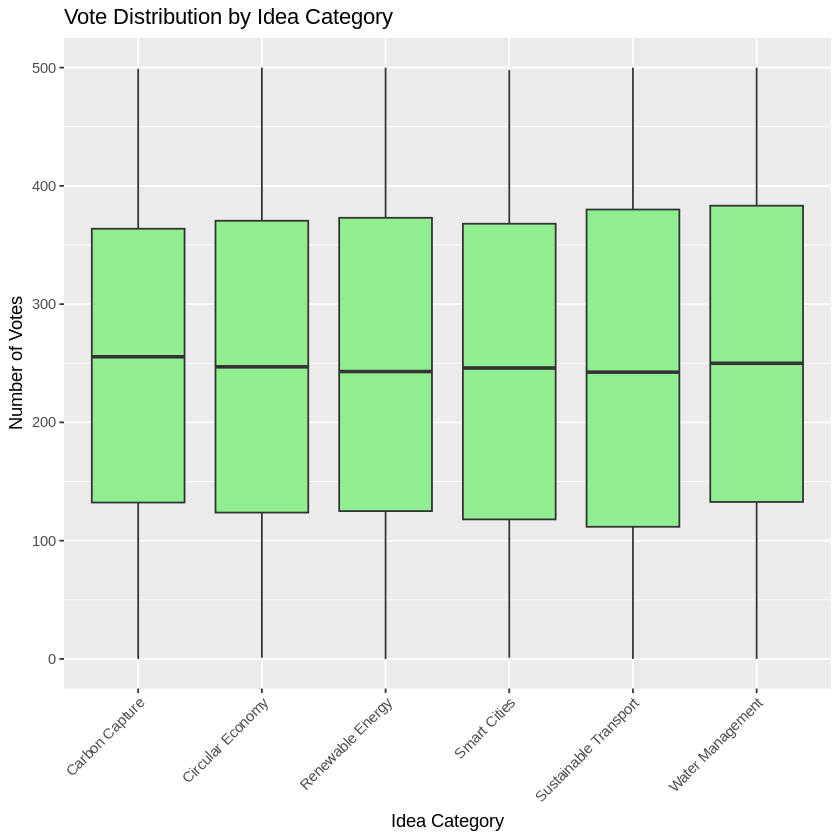

In [ ]:
#Example 2: Boxplot — Distribution of Votes by Idea Category
ggplot(ideas, aes(x = `Idea Category`, y = `Number of Votes`)) +
  geom_boxplot(fill = "lightgreen") +
  labs(title = "Vote Distribution by Idea Category",
       x = "Idea Category",
       y = "Number of Votes") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


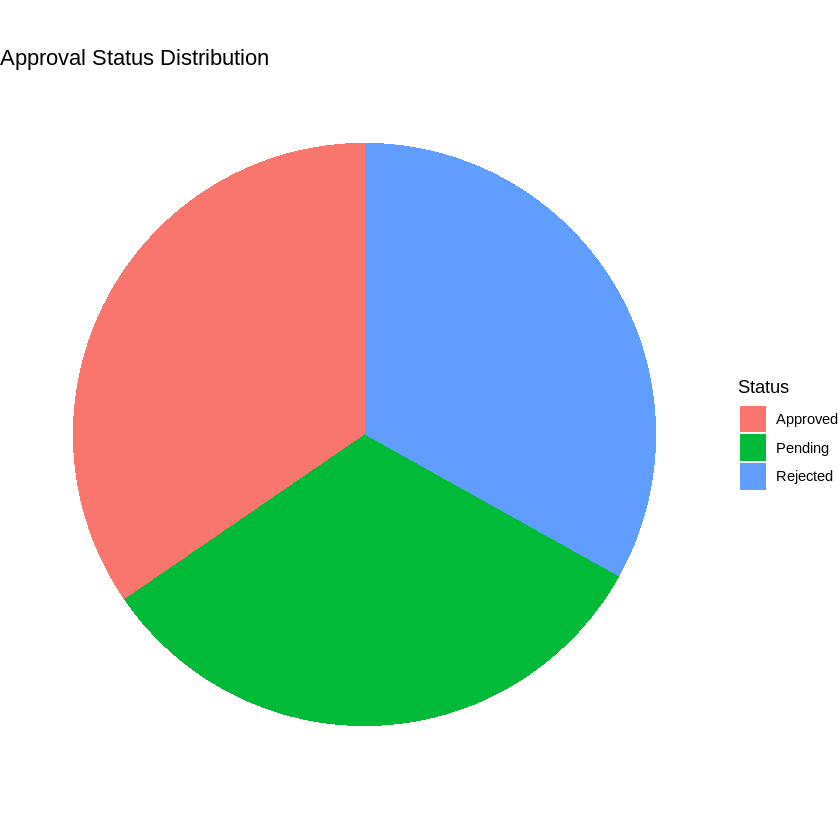

In [ ]:
#Example 3: Pie Chart — Approval Status Distribution
approval_data <- as.data.frame(table(ideas$`Approval Status`))
colnames(approval_data) <- c("Status", "Count")

ggplot(approval_data, aes(x = "", y = Count, fill = Status)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y") +
  labs(title = "Approval Status Distribution") +
  theme_void()


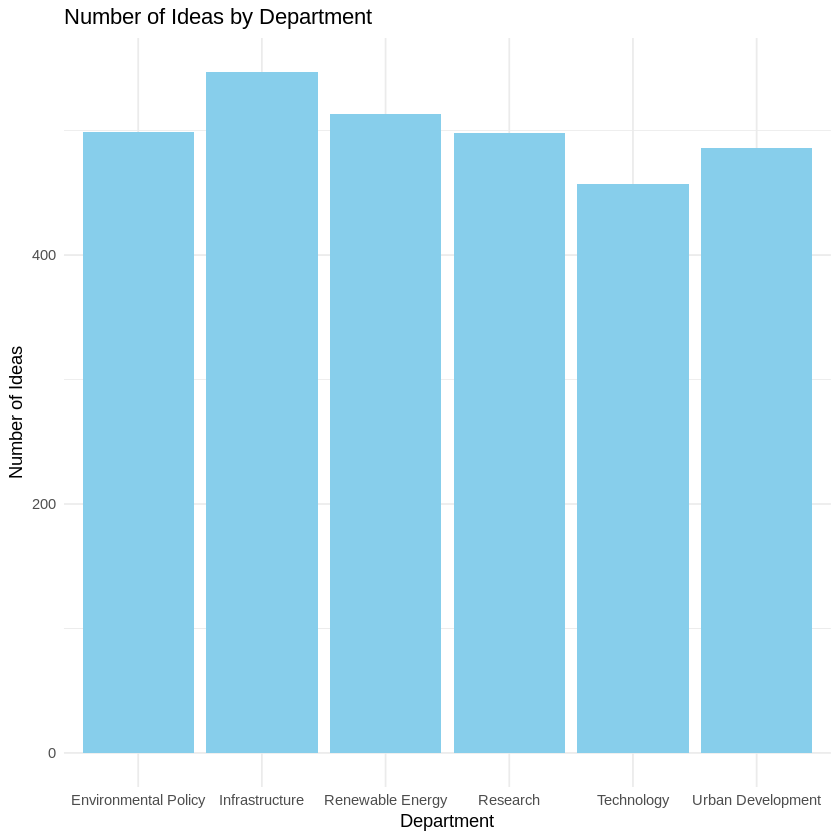

In [ ]:
#Example 4: Bar Chart — Number of Ideas per Department

ggplot(ideas, aes(x = Department)) +
  geom_bar(fill = "skyblue") +
  labs(title = "Number of Ideas by Department",
       x = "Department",
       y = "Number of Ideas") +
  theme_minimal()
